In [26]:
%matplotlib inline
import numpy as np
from sklearn.cluster import MeanShift
from sklearn.feature_extraction.image import extract_patches_2d,reconstruct_from_patches_2d
from matplotlib import pyplot as plt
import cv2
import random

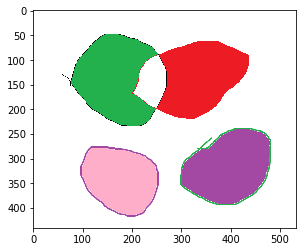

(441, 533, 3)


In [27]:
#path="trash_image.jpg"
#path="Arcimboldo.jpg"
path="cas_simple.png"
resize_ratio =1
img=cv2.resize(cv2.imread(path,1), (0,0), fx=resize_ratio, fy=resize_ratio)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb,interpolation='nearest')
plt.show()
lab=cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
hsv=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
print(rgb.shape)

In [28]:
D=np.zeros((lab.shape[0]*lab.shape[1],5))
counter=0
for i in range(img.shape[0]):
    for j in range(img.shape[1]):      
        arr= lab[i][j]
        D[counter]=np.array([arr[0],arr[1],arr[2],i,j])
        counter+=1
print('espace de caractéristiques généré')

espace de caractéristiques généré


In [29]:
model=MeanShift(n_jobs=-1, cluster_all=True,bin_seeding=True,bandwidth=60)
model.fit(D)
print(len(model.cluster_centers_))

25


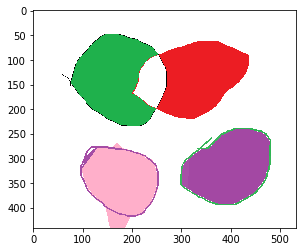

In [30]:
result=np.zeros_like(lab)
for (_,_,_,x,y), label in zip(D, model.labels_):
    color_lab=np.uint8([[np.apply_along_axis(lambda x : np.round(x),0,model.cluster_centers_[label][:3])]])
    color_rgb=cv2.cvtColor(color_lab, cv2.COLOR_LAB2RGB)
    result[int(x)][int(y)]=color_rgb[0,0]
    
plt.imshow(result, interpolation='nearest')
plt.show()